# LEAD SCORE - CASE STUDY 

## PROBLEM STATEMENT :
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals And Objective

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2. There are some more problems presented by the company which your model should be able to adjust to if the company's           requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file   Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final  PPT where you'll make recommendations.

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data
df = pd.read_csv('Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# check the shape of data
df.shape

(9240, 37)

In [6]:
# check the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# check the description of data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# check the data types of data
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## Data Cleaning and Treatment

In [9]:
# check the duplicates 
duplicate = df[df.duplicated()]
duplicate

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


here we can see that there are no duplicates 

In [10]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('Select',np.nan)

In [11]:
# dropped prospect id and lead number as they are unique id numbers which have no use in modeling
df = df.drop(['Prospect ID','Lead Number'],axis = 1)

In [12]:
# check null value counts
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
# check the percentage of null values
round(100*(df.isnull().sum())/len(df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# dropping the columns with more than 40 % null values 
df1 = df.drop(['Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','City'],axis=1)

In [15]:
# dropping sales generated columns as they are not of any use in modeling
df2 = df1.drop(['Tags','Last Notable Activity','Last Activity'],axis = 1)

In [16]:
# check the percentage of null values
round(100*(df2.isnull().sum())/len(df2.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [17]:
# for Country column
df2['Country'].value_counts(normalize = True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Canada                  0.000590
South Africa            0.000590
Kuwait                  0.000590
Nigeria                 0.000590
Germany                 0.000590
Sweden                  0.000443
Uganda                  0.000295
Philippines             0.000295
Asia/Pacific Region     0.000295
Bangladesh              0.000295
Italy                   0.000295
China                   0.000295
Netherlands             0.000295
Ghana                   0.000295
Belgium                 0.000295
Kenya                   0.000148
Russia                  0.000148
Indonesia 

as we can see that around 68 percent  contain india and 27 percent is missing values  so we can drop that column also

In [18]:
cols_drop = df2['Country']

In [19]:
# Check the value counts for the column Lead Source

df2['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
testone                 1
blog                    1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
# so we can see that google has coming twice so we can convert all case google in one case

df2['Lead Source'] = df2['Lead Source'].replace('google', 'Google')



In [21]:
# here majority of values are google so we can impute null values to google
df2['Lead Source'] = df2['Lead Source'].replace(np.nan, 'Google')


In [22]:
# we can see that there are values which have only 1 value so we can convert them into others category 

def slots(x):
    category = ""
    if x == "Google":
        category = "Google"
    elif x == "Direct Traffic":
        category = "Direct Traffic"
    elif x == "Olark Chat":
        category = "Olark Chat"
    elif x == "Organic Search":
        category = "Organic Search"
    elif x == "Reference":
        category = "Reference"
    else:
        category = "other social "
    return category

In [23]:

df2['Lead Source'] = df2.apply(lambda x:slots(x['Lead Source']), axis = 1)
df2['Lead Source'].value_counts(normalize = True)

Google            0.314827
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
other social      0.037338
Name: Lead Source, dtype: float64

In [24]:
# check the median value for total visit
df2['TotalVisits'].median()

3.0

In [25]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

df2['TotalVisits'] = df2['TotalVisits'].replace(np.nan, df2['TotalVisits'].median())

In [26]:
# Check the median of the column

df2['Page Views Per Visit'].median()

2.0

In [27]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

df2['Page Views Per Visit'] = df2['Page Views Per Visit'].replace(np.nan, df2['Page Views Per Visit'].median())

In [28]:
# Check the value counts for the column "What is your current Occupation"

df2['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
# Since no information has been provided Current Occupation, we can add a new category called not provided and set that as value for the null columns
   

df2['What is your current occupation'] = df2['What is your current occupation'].replace(np.nan, 'not provided')

In [30]:
# we see that housewife,businessman,other ,student are very low values so we can group them in one category other

def slot(x):
    category = ""
    if x == "Unemployed":
        category = "Unemployed"
    elif x == "Working Professional":
        category = "Working Professional"
    else:
        category = "other"
    return category

In [31]:
df2['What is your current occupation'] = df2.apply(lambda x:slot(x['What is your current occupation']), axis = 1)
df2['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.606061
other                   0.317532
Working Professional    0.076407
Name: What is your current occupation, dtype: float64

In [32]:
# Check the value counts for the column What matters most to you in choosing a course 

df2['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [33]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

cols_drop = df2[['Country','What matters most to you in choosing a course']]

In [34]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque
df2 = df2.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [35]:
# drop country and what matters most to you in choosing course as they have almost 30 % missing values and 70 % has one value
df2 = df2.drop(cols_drop,axis = 1)

In [36]:
# check the shape 
df2.shape
    

(9240, 17)

In [37]:
# check the percentage of missing values
round(100*(df2.isnull().sum())/len(df2.index),2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Specialization                            36.58
What is your current occupation            0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
dtype: float64

In [38]:
# for specilaization
df2['Specialization'].value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [39]:
# drop specialization column as it contain high number of missing values
df2 = df2.drop(['Specialization'],axis = 1)

In [40]:
# check null values again
df2.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

In [41]:
# check the unique values
df2.nunique()

Lead Origin                                  5
Lead Source                                  6
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
What is your current occupation              3
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64

In [42]:
# for search column
df2['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

as it is skewed categorical column so we can drop this

In [43]:
df2['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [44]:
df2['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [45]:
df2['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [46]:
df2['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [47]:
df2['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [48]:
df2['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

as all the above columns are skewed categorical columns so we can drop these columns 


In [49]:
df3 = df2.drop(['Search','Newspaper','Digital Advertisement','Through Recommendations','X Education Forums','Newspaper Article','Do Not Call'],axis = 1)

In [50]:
# check the percentage of missing values
round(100*(df3.isnull().sum())/len(df3.index),2)


Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [51]:
df3['Do Not Email'].value_counts(normalize = True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [52]:
#check the outliers 
df3.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [53]:
# Removing values beyond 99% for Total Visits

quan = df3['TotalVisits'].quantile(0.99)
df3 = df3[df3["TotalVisits"] < quan]



In [54]:
# Removing values beyond 99% for Page Views Per Visit

quane = df3['Page Views Per Visit'].quantile(0.99)
df3 = df3[df3["Page Views Per Visit"] < quane]

In [55]:
# check the percentage of rows that are left after cleaning is 
num_data = round(100*(len(df3)/9240),2)
print(num_data)

97.72


at this stage data is cleaned and around 98% data is retained so we are good to go for modeling

## EDA

### Univariate analysis for categorical column

In [56]:
df3.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

In [57]:
df3.shape

(9029, 9)

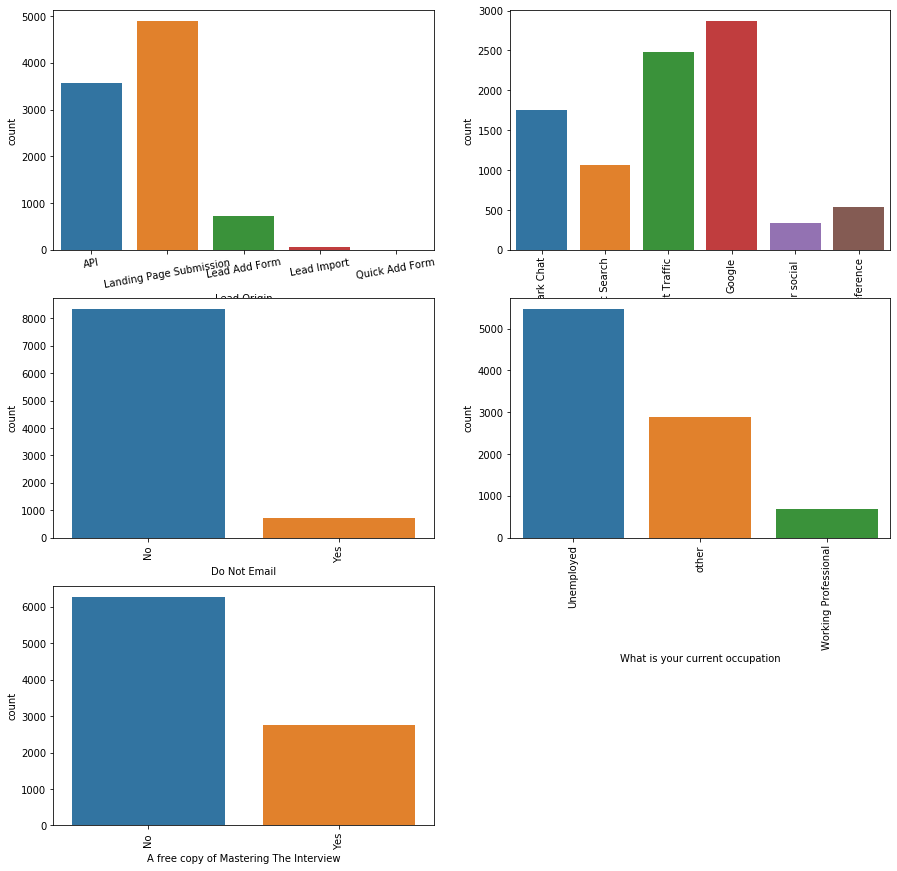

In [58]:
plt.figure(figsize=[15,15])
plt.subplot(3,2,1)
plt.xticks(rotation = 10)
sns.countplot(x = 'Lead Origin',data =df)

plt.subplot(3,2,2)
plt.xticks(rotation = 90)
sns.countplot(x = 'Lead Source',data =df3)
plt.subplot(3,2,3)
plt.xticks(rotation = 90)
sns.countplot(x = 'Do Not Email',data =df3)
plt.subplot(3,2,4)
plt.xticks(rotation = 90)
sns.countplot(x = 'What is your current occupation',data =df3)
plt.subplot(3,2,5)
plt.xticks(rotation = 90)
sns.countplot(x = 'A free copy of Mastering The Interview',data =df3)


as we can see that count of unemployed is much more in data and landing page submission has also more count in lead origin category

# Bivariate ANalysis

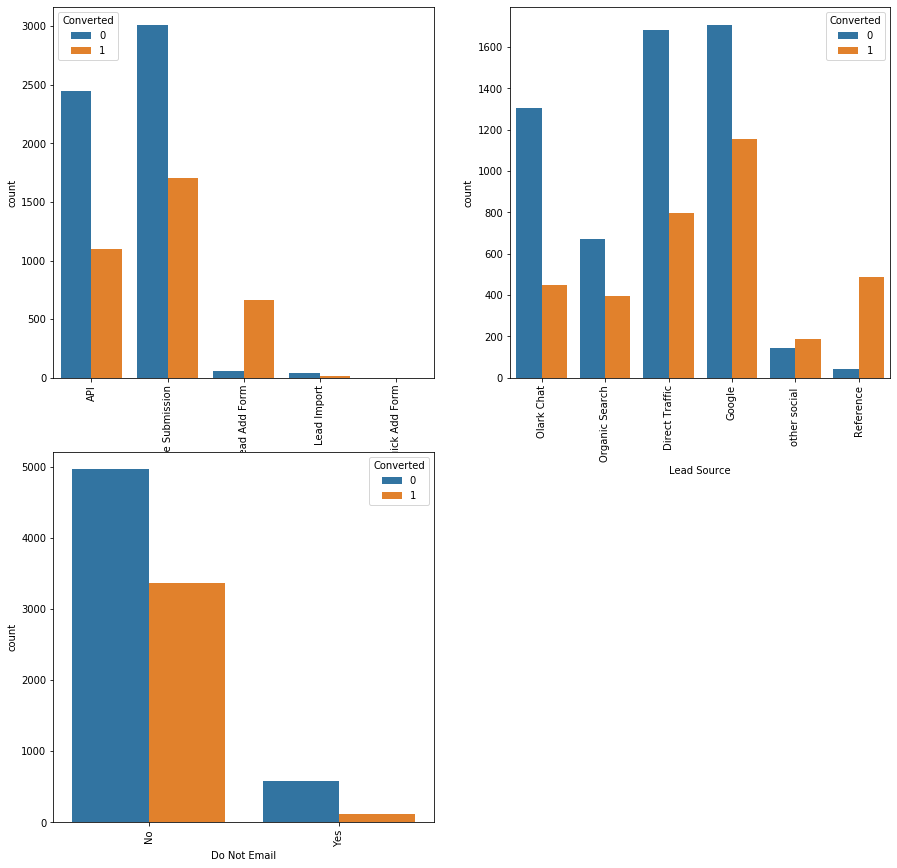

In [59]:
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
plt.xticks(rotation = 90)
sns.countplot(x = 'Lead Origin',hue = 'Converted',data =df3)

plt.subplot(2,2,2)
plt.xticks(rotation = 90)
sns.countplot(x = 'Lead Source',hue = 'Converted',data =df3)
plt.subplot(2,2,3)
plt.xticks(rotation = 90)
sns.countplot(x = 'Do Not Email',hue = 'Converted',data =df3)


1. In lead origin landing page submission have less conversion and lead add form have more conversion rate

2. In lead source reference and other social platform  have more conversion rate

3. In do not email in both yes or no conversion rate is less 

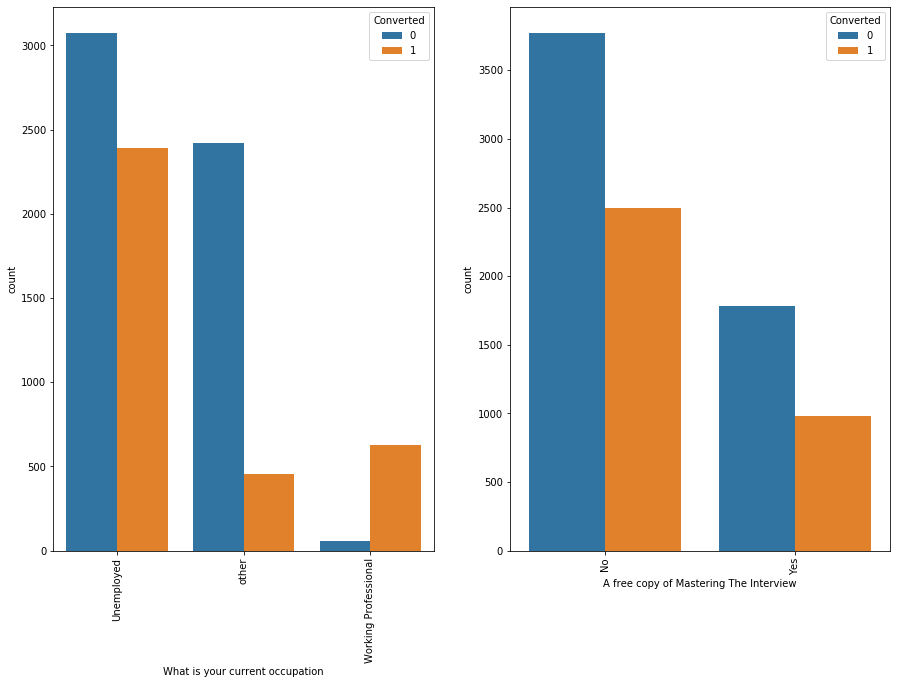

In [60]:
plt.figure(figsize = [15,10])
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
sns.countplot(x = 'What is your current occupation',hue = 'Converted',data =df3)
plt.subplot(1,2,2)
plt.xticks(rotation = 90)
sns.countplot(x = 'A free copy of Mastering The Interview',hue = 'Converted',data =df3)

1. In what is your current occupation working professional have more conversion rate

2. In a free copy of mastering the interview in both yes or no conversion rate is less

#### for dummy variable creation we need to change categorical varible in binary

In [61]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df3[varlist] = df3[varlist].apply(binary_map)

In [62]:
df3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,other,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0


In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df3[['Lead Origin', 'Lead Source', 'Do Not Email', 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
df3 = pd.concat([df3, dummy1], axis=1)

In [64]:
df3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Do Not Email,...,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other social,What is your current occupation_Working Professional,What is your current occupation_other
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,0,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,other,1,0,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0,0,...,0,0,0,1,0,0,0,0,0,0


##  drop the repeated variables

In [65]:
# we can create dummy variables of categorical variaables so we can drop them
df3 = df3.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'What is your current occupation'],axis = 1)

In [66]:
df3.shape

(9029, 16)

In [67]:
df3.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other social,What is your current occupation_Working Professional,What is your current occupation_other
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0


## Test and Train split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Putting feature variable to X
X = df3.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other social,What is your current occupation_Working Professional,What is your current occupation_other
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0


In [70]:
# Putting response variable to y
y = df3['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other social,What is your current occupation_Working Professional,What is your current occupation_other
5493,-0.394290,-0.708153,-0.135234,1,1,0,0,0,0,0,0,0,0,0,0
8064,-0.039721,-0.711823,0.410454,0,0,0,0,0,0,0,0,0,0,0,0
4716,-0.039721,-0.471434,0.410454,1,1,0,0,0,0,0,1,0,0,0,1
9117,-1.103429,-0.884316,-1.226608,0,0,0,0,0,0,1,0,0,0,0,0
2402,1.023987,0.704822,-0.135234,0,1,0,0,0,1,0,0,0,0,0,0


In [74]:
### Checking the Converted Rate
converted = (sum(df3['Converted'])/len(df3['Converted'].index))*100
converted

38.50924797873519

so we can see that conversion rate is 38 percent

# looking at correlations

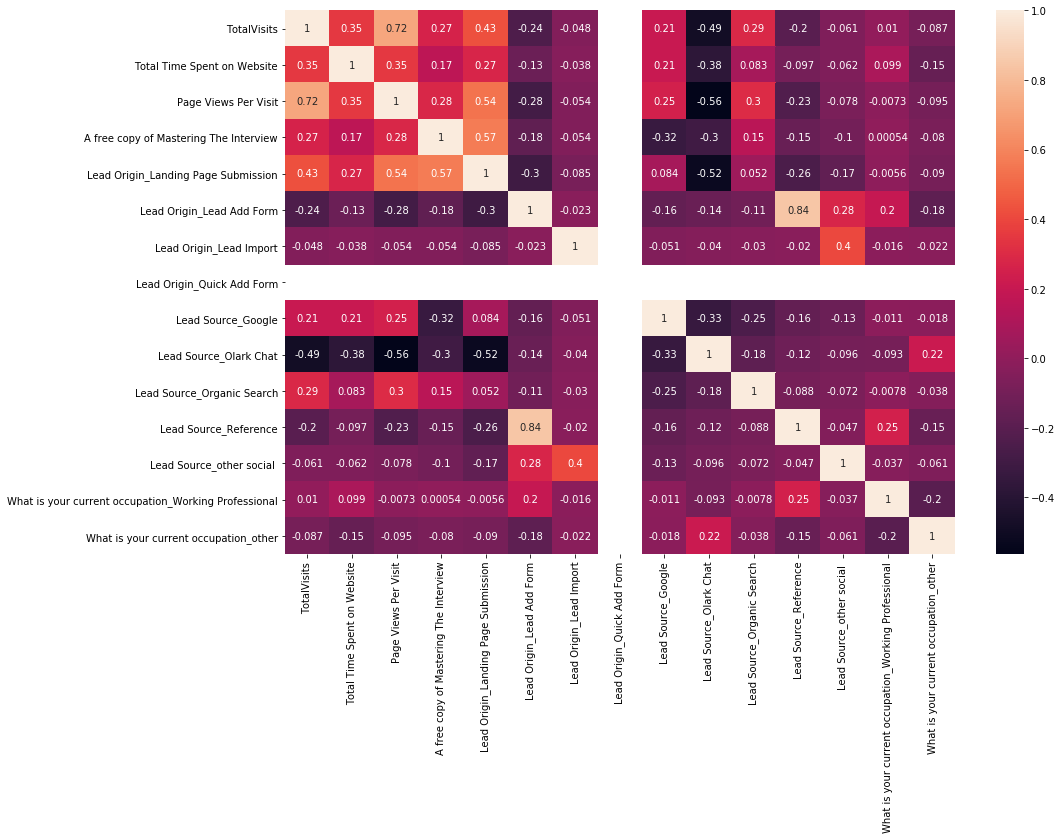

In [75]:

# To check the correlation among varibles
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [76]:
import statsmodels.api as sm

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.2
Date:                Mon, 07 Dec 2020   Deviance:                       5792.4
Time:                        21:51:16   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9742      0.120     -8.129      0.000      -1.209      -0.739
TotalVisits                                              0.2171      0.047      4.596      0.000       0.125       0.310
Total Time Spent on Website                              1.0951      0.039     28.437      0.000       1.020       1.171
Page Views Per Visit                                    -0.0428      0.054     -0.798      0.425      -0.148       0.062
A free copy of Mastering The Interview                  -0.0066      0.101     -0.065      0.948      -0.206       0.192
Lead Origin_Landing Page Submission                     -0.0714      0.101     -0.707      0.480      -0.269       0.127
Lead Origin_Lead Add Form                                4.5723      0.441     10.374      0.000       3.708       5.436
Lead Origin_Lead Import                                  0.1444      0.504      0.287      0.774      -0.843       1.132
Lead Origin_Quick Add Form                            4.206e-15   1.98e-15      2.123      0.034    3.23e-16    8.09e-15
Lead Source_Google                                       0.3237      0.107      3.034      0.002       0.115       0.533
Lead Source_Olark Chat                                   1.3599      0.151      9.035      0.000       1.065       1.655
Lead Source_Organic Search                               0.0413      0.123      0.336      0.737      -0.200       0.282
Lead Source_Reference                                   -0.6487      0.486     -1.335      0.182      -1.601       0.304
Lead Source_other social                                 0.1220      0.285      0.428      0.669      -0.436       0.680
What is your current occupation_Working Professional     2.3887      0.174     13.709      0.000       2.047       2.730
What is your current occupation_other                   -1.2050      0.078    -15.478      0.000      -1.358      -1.052
========================================================================================================================
"""

###  Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_other social ', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('What is your current occupation_other', True, 1)]

In [82]:
col = X_train.columns[rfe.support_]

##### Assessing the model with StatsModels

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.2
Date:                Mon, 07 Dec 2020   Deviance:                       5792.4
Time:                        21:51:16   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9742      0.120     -8.129      0.000      -1.209      -0.739
TotalVisits                                              0.2171      0.047      4.596      0.000       0.125       0.310
Total Time Spent on Website                              1.0951      0.039     28.437      0.000       1.020       1.171
Page Views Per Visit                                    -0.0428      0.054     -0.798      0.425      -0.148       0.062
A free copy of Mastering The Interview                  -0.0066      0.101     -0.065      0.948      -0.206       0.192
Lead Origin_Landing Page Submission                     -0.0714      0.101     -0.707      0.480      -0.269       0.127
Lead Origin_Lead Add Form                                4.5723      0.441     10.374      0.000       3.708       5.436
Lead Origin_Lead Import                                  0.1444      0.504      0.287      0.774      -0.843       1.132
Lead Origin_Quick Add Form                            4.206e-15   1.98e-15      2.123      0.034    3.23e-16    8.09e-15
Lead Source_Google                                       0.3237      0.107      3.034      0.002       0.115       0.533
Lead Source_Olark Chat                                   1.3599      0.151      9.035      0.000       1.065       1.655
Lead Source_Organic Search                               0.0413      0.123      0.336      0.737      -0.200       0.282
Lead Source_Reference                                   -0.6487      0.486     -1.335      0.182      -1.601       0.304
Lead Source_other social                                 0.1220      0.285      0.428      0.669      -0.436       0.680
What is your current occupation_Working Professional     2.3887      0.174     13.709      0.000       2.047       2.730
What is your current occupation_other                   -1.2050      0.078    -15.478      0.000      -1.358      -1.052
========================================================================================================================
"""

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.129261
8064    0.144321
4716    0.059612
9117    0.316542
2402    0.569074
1796    0.121879
1120    0.121879
253     0.070535
1491    0.129364
2004    0.133387
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12926098, 0.14432092, 0.05961219, 0.316542  , 0.56907437,
       0.12187933, 0.12187933, 0.07053543, 0.12936373, 0.13338693])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID
0,0,0.129261,5493
1,0,0.144321,8064
2,0,0.059612,4716
3,0,0.316542,9117
4,1,0.569074,2402


In [87]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.129261,5493,0
1,0,0.144321,8064,0
2,0,0.059612,4716,0
3,0,0.316542,9117,0
4,1,0.569074,2402,1


In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3474  435]
 [ 873 1538]]


In [91]:
# Predicted     not_converted    converted
# Actual
# not_converted        3480      429
# converted           853       1558  

In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7930379746835443


### checking vif

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,6.88
11,Lead Source_Reference,5.88
4,Lead Origin_Landing Page Submission,3.52
2,Page Views Per Visit,2.80
3,A free copy of Mastering The Interview,2.60
0,TotalVisits,2.24
12,Lead Source_other social,2.17
9,Lead Source_Olark Chat,1.87
8,Lead Source_Google,1.68
14,What is your current occupation_other,1.57


as we can see A free copy of Mastering The Interview has a very high p value so it is insifgnificant so we drop this column

In [95]:
col = col.drop('A free copy of Mastering The Interview',1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_other social ',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other'],
      dtype='object')

In [96]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.2
Date:                Mon, 07 Dec 2020   Deviance:                       5792.4
Time:                        21:51:17   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9771      0.111     -8.803      0.000      -1.195      -0.760
TotalVisits                                              0.2169      0.047      4.605      0.000       0.125       0.309
Total Time Spent on Website                              1.0950      0.038     28.456      0.000       1.020       1.170
Page Views Per Visit                                    -0.0426      0.054     -0.796      0.426      -0.148       0.062
Lead Origin_Landing Page Submission                     -0.0736      0.095     -0.771      0.441      -0.261       0.114
Lead Origin_Lead Add Form                                4.5725      0.441     10.374      0.000       3.709       5.436
Lead Origin_Lead Import                                  0.1447      0.504      0.287      0.774      -0.843       1.132
Lead Origin_Quick Add Form                           -7.931e-15   2.52e-15     -3.143      0.002   -1.29e-14   -2.99e-15
Lead Source_Google                                       0.3274      0.091      3.606      0.000       0.149       0.505
Lead Source_Olark Chat                                   1.3624      0.145      9.370      0.000       1.077       1.647
Lead Source_Organic Search                               0.0423      0.122      0.347      0.729      -0.197       0.281
Lead Source_Reference                                   -0.6461      0.484     -1.334      0.182      -1.595       0.303
Lead Source_other social                                 0.1244      0.282      0.441      0.659      -0.429       0.678
What is your current occupation_Working Professional     2.3889      0.174     13.712      0.000       2.047       2.730
What is your current occupation_other                   -1.2048      0.078    -15.487      0.000      -1.357      -1.052
========================================================================================================================
"""

In [97]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [98]:
y_train_pred[:10]

array([0.1294481 , 0.14397506, 0.05977406, 0.31648521, 0.56863464,
       0.12187194, 0.12187194, 0.07046288, 0.12962912, 0.13357874])

In [99]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [100]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.129448,5493,0
1,0,0.143975,8064,0
2,0,0.059774,4716,0
3,0,0.316485,9117,0
4,1,0.568635,2402,1


In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.792879746835443


##### Let's check the VIFs again

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,6.87
10,Lead Source_Reference,5.88
2,Page Views Per Visit,2.79
0,TotalVisits,2.23
11,Lead Source_other social,2.17
8,Lead Source_Olark Chat,1.87
3,Lead Origin_Landing Page Submission,1.72
13,What is your current occupation_other,1.56
7,Lead Source_Google,1.43
5,Lead Origin_Lead Import,1.38


In [103]:
# Let's drop Lead Origin_Lead Import since it has a p value and it is insignificant
col = col.drop('Lead Origin_Lead Import')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_other social ',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other'],
      dtype='object')

In [104]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.2
Date:                Mon, 07 Dec 2020   Deviance:                       5792.5
Time:                        21:51:17   Pearson chi2:                 7.51e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9757      0.111     -8.801      0.000      -1.193      -0.758
TotalVisits                                              0.2164      0.047      4.599      0.000       0.124       0.309
Total Time Spent on Website                              1.0946      0.038     28.468      0.000       1.019       1.170
Page Views Per Visit                                    -0.0435      0.054     -0.813      0.416      -0.148       0.061
Lead Origin_Landing Page Submission                     -0.0744      0.095     -0.780      0.435      -0.261       0.113
Lead Origin_Lead Add Form                                4.5368      0.422     10.757      0.000       3.710       5.363
Lead Origin_Quick Add Form                            1.453e-15   8.71e-17     16.681      0.000    1.28e-15    1.62e-15
Lead Source_Google                                       0.3275      0.091      3.607      0.000       0.150       0.505
Lead Source_Olark Chat                                   1.3594      0.145      9.375      0.000       1.075       1.644
Lead Source_Organic Search                               0.0427      0.122      0.350      0.726      -0.196       0.282
Lead Source_Reference                                   -0.6136      0.470     -1.306      0.192      -1.534       0.307
Lead Source_other social                                 0.1630      0.247      0.660      0.509      -0.321       0.647
What is your current occupation_Working Professional     2.3891      0.174     13.712      0.000       2.048       2.731
What is your current occupation_other                   -1.2053      0.078    -15.497      0.000      -1.358      -1.053
========================================================================================================================
"""

In [105]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [106]:
y_train_pred[:10]

array([0.12958209, 0.14414398, 0.05979574, 0.3165581 , 0.56862686,
       0.1218592 , 0.1218592 , 0.07042883, 0.1293306 , 0.13371478])

In [107]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [108]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.129582,5493,0
1,0,0.144144,8064,0
2,0,0.059796,4716,0
3,0,0.316558,9117,0
4,1,0.568627,2402,1


In [109]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7935126582278481


In [110]:
##### Let's now check the VIFs again

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,6.01
9,Lead Source_Reference,5.31
2,Page Views Per Visit,2.78
0,TotalVisits,2.22
7,Lead Source_Olark Chat,1.86
3,Lead Origin_Landing Page Submission,1.72
10,Lead Source_other social,1.59
12,What is your current occupation_other,1.56
6,Lead Source_Google,1.42
1,Total Time Spent on Website,1.27


In [112]:
# Let's drop Lead Source_Organic Search since it has a p value
col = col.drop('Lead Source_Organic Search')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_other social ',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other'],
      dtype='object')

In [113]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.3
Date:                Mon, 07 Dec 2020   Deviance:                       5792.6
Time:                        21:51:17   Pearson chi2:                 7.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9550      0.094    -10.185      0.000      -1.139      -0.771
TotalVisits                                              0.2184      0.047      4.681      0.000       0.127       0.310
Total Time Spent on Website                              1.0942      0.038     28.469      0.000       1.019       1.170
Page Views Per Visit                                    -0.0402      0.053     -0.763      0.445      -0.143       0.063
Lead Origin_Landing Page Submission                     -0.0858      0.090     -0.956      0.339      -0.262       0.090
Lead Origin_Lead Add Form                                4.5407      0.422     10.768      0.000       3.714       5.367
Lead Origin_Quick Add Form                           -3.315e-15   4.37e-16     -7.588      0.000   -4.17e-15   -2.46e-15
Lead Source_Google                                       0.3118      0.079      3.945      0.000       0.157       0.467
Lead Source_Olark Chat                                   1.3444      0.138      9.711      0.000       1.073       1.616
Lead Source_Reference                                   -0.6326      0.467     -1.355      0.175      -1.547       0.282
Lead Source_other social                                 0.1435      0.241      0.596      0.551      -0.328       0.615
What is your current occupation_Working Professional     2.3890      0.174     13.712      0.000       2.047       2.730
What is your current occupation_other                   -1.2056      0.078    -15.503      0.000      -1.358      -1.053
========================================================================================================================
"""

In [114]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [115]:
y_train_pred[:10]

array([0.13052133, 0.14690493, 0.05800593, 0.31648314, 0.5674291 ,
       0.12178815, 0.12178815, 0.07025708, 0.12704777, 0.13467799])

In [116]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [117]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.130521,5493,0
1,0,0.146905,8064,0
2,0,0.058006,4716,0
3,0,0.316483,9117,0
4,1,0.567429,2402,1


In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7936708860759494


In [119]:
##### Let's now check the VIFs again

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,5.96
8,Lead Source_Reference,5.30
2,Page Views Per Visit,2.71
0,TotalVisits,2.18
7,Lead Source_Olark Chat,1.84
3,Lead Origin_Landing Page Submission,1.67
9,Lead Source_other social,1.58
11,What is your current occupation_other,1.53
6,Lead Source_Google,1.36
1,Total Time Spent on Website,1.27


In [121]:
# Let's drop Lead Source_other sociall  since it has a p value
col = col.drop('Lead Source_other social ')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other'],
      dtype='object')

In [122]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.5
Date:                Mon, 07 Dec 2020   Deviance:                       5793.0
Time:                        21:51:18   Pearson chi2:                 7.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9384      0.089    -10.494      0.000      -1.114      -0.763
TotalVisits                                              0.2182      0.047      4.676      0.000       0.127       0.310
Total Time Spent on Website                              1.0933      0.038     28.476      0.000       1.018       1.169
Page Views Per Visit                                    -0.0398      0.053     -0.756      0.450      -0.143       0.063
Lead Origin_Landing Page Submission                     -0.0976      0.087     -1.116      0.265      -0.269       0.074
Lead Origin_Lead Add Form                                4.6466      0.384     12.105      0.000       3.894       5.399
Lead Origin_Quick Add Form                           -1.153e-14   1.07e-15    -10.809      0.000   -1.36e-14   -9.44e-15
Lead Source_Google                                       0.3022      0.077      3.908      0.000       0.151       0.454
Lead Source_Olark Chat                                   1.3273      0.135      9.805      0.000       1.062       1.593
Lead Source_Reference                                   -0.7556      0.419     -1.801      0.072      -1.578       0.067
What is your current occupation_Working Professional     2.3882      0.174     13.708      0.000       2.047       2.730
What is your current occupation_other                   -1.2056      0.078    -15.503      0.000      -1.358      -1.053
========================================================================================================================
"""

In [123]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [124]:
y_train_pred[:10]

array([0.13115154, 0.14910682, 0.05830501, 0.31650544, 0.5660412 ,
       0.12179859, 0.12179859, 0.07000409, 0.12761981, 0.13532176])

In [125]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [126]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.131152,5493,0
1,0,0.149107,8064,0
2,0,0.058305,4716,0
3,0,0.316505,9117,0
4,1,0.566041,2402,1


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7938291139240506


In [128]:
##### Let's now check the VIFs again

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,3.85
8,Lead Source_Reference,3.75
2,Page Views Per Visit,2.71
0,TotalVisits,2.18
7,Lead Source_Olark Chat,1.84
3,Lead Origin_Landing Page Submission,1.67
10,What is your current occupation_other,1.52
6,Lead Source_Google,1.35
1,Total Time Spent on Website,1.27
9,What is your current occupation_Working Profes...,1.19


In [130]:
# Let's drop Page Views Per Visit since it has a p value
col = col.drop('Page Views Per Visit')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other'],
      dtype='object')

In [131]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.8
Date:                Mon, 07 Dec 2020   Deviance:                       5793.5
Time:                        21:51:18   Pearson chi2:                 7.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9393      0.089    -10.510      0.000      -1.114      -0.764
TotalVisits                                              0.1999      0.040      5.008      0.000       0.122       0.278
Total Time Spent on Website                              1.0930      0.038     28.469      0.000       1.018       1.168
Lead Origin_Landing Page Submission                     -0.1089      0.086     -1.265      0.206      -0.278       0.060
Lead Origin_Lead Add Form                                4.6752      0.382     12.237      0.000       3.926       5.424
Lead Origin_Quick Add Form                           -9.237e-15   8.21e-16    -11.245      0.000   -1.08e-14   -7.63e-15
Lead Source_Google                                       0.3001      0.077      3.884      0.000       0.149       0.452
Lead Source_Olark Chat                                   1.3549      0.130     10.385      0.000       1.099       1.611
Lead Source_Reference                                   -0.7568      0.419     -1.804      0.071      -1.579       0.065
What is your current occupation_Working Professional     2.3881      0.174     13.708      0.000       2.047       2.730
What is your current occupation_other                   -1.2043      0.078    -15.493      0.000      -1.357      -1.052
========================================================================================================================
"""

In [132]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [133]:
y_train_pred[:10]

array([0.12998757, 0.15119152, 0.05865073, 0.31614176, 0.55648462,
       0.12176568, 0.12176568, 0.07127724, 0.12906556, 0.13412537])

In [134]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [135]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.129988,5493,0
1,0,0.151192,8064,0
2,0,0.058651,4716,0
3,0,0.316142,9117,0
4,1,0.556485,2402,1


In [136]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7944620253164557


In [137]:
##### Let's now check the VIFs again

In [138]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,3.77
7,Lead Source_Reference,3.75
6,Lead Source_Olark Chat,1.62
2,Lead Origin_Landing Page Submission,1.55
0,TotalVisits,1.54
9,What is your current occupation_other,1.52
5,Lead Source_Google,1.35
1,Total Time Spent on Website,1.27
8,What is your current occupation_Working Profes...,1.19
4,Lead Origin_Quick Add Form,NaN


In [139]:
# Let's drop Lead Origin_Landing Page Submission since it has a p value
col = col.drop('Lead Origin_Landing Page Submission')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'What is your current occupation_Working Professional',
       'What is your current occupation_other'],
      dtype='object')

In [140]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.6
Date:                Mon, 07 Dec 2020   Deviance:                       5795.1
Time:                        21:51:18   Pearson chi2:                 7.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0259      0.058    -17.737      0.000      -1.139      -0.913
TotalVisits                                              0.1951      0.040      4.909      0.000       0.117       0.273
Total Time Spent on Website                              1.0923      0.038     28.458      0.000       1.017       1.168
Lead Origin_Lead Add Form                                4.7529      0.377     12.600      0.000       4.014       5.492
Lead Origin_Quick Add Form                           -4.939e-15   8.66e-16     -5.702      0.000   -6.64e-15   -3.24e-15
Lead Source_Google                                       0.3215      0.075      4.265      0.000       0.174       0.469
Lead Source_Olark Chat                                   1.4347      0.115     12.527      0.000       1.210       1.659
Lead Source_Reference                                   -0.7535      0.419     -1.796      0.072      -1.576       0.069
What is your current occupation_Working Professional     2.3819      0.174     13.683      0.000       2.041       2.723
What is your current occupation_other                   -1.2001      0.078    -15.459      0.000      -1.352      -1.048
========================================================================================================================
"""

In [141]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [142]:
y_train_pred[:10]

array([0.13281026, 0.14049597, 0.06015888, 0.31596543, 0.56594747,
       0.12211957, 0.12211957, 0.07444159, 0.13036995, 0.13702109])

In [143]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [144]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.132810,5493,0
1,0,0.140496,8064,0
2,0,0.060159,4716,0
3,0,0.315965,9117,0
4,1,0.565947,2402,1


In [145]:
##### Let's now check the VIFs again

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.77
6,Lead Source_Reference,3.75
5,Lead Source_Olark Chat,1.62
0,TotalVisits,1.45
8,What is your current occupation_other,1.38
1,Total Time Spent on Website,1.26
4,Lead Source_Google,1.22
7,What is your current occupation_Working Profes...,1.16
3,Lead Origin_Quick Add Form,NaN


since all the p values and vif value is significant we are good to go for this model

In [147]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3478,  431],
       [ 872, 1539]], dtype=int64)

In [148]:
# Predicted     not_converted    converted
# Actual
# not_converted        3478      431
# converted           872       1539

In [149]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7938291139240506

## Metrics beyond simply accuracy

In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
#  Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6383243467440896

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.8897416218981837

In [153]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11025837810181632


In [154]:
# positive predictive value 
print (TP / float(TP+FP))

0.7812182741116751


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7995402298850575


### : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [156]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

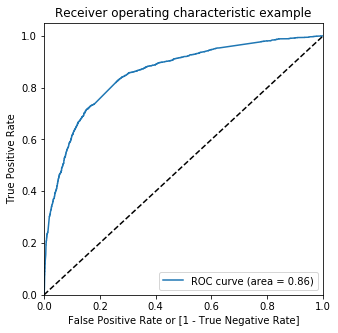

In [158]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [159]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.132810,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.140496,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.060159,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.315965,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.565947,2402,1,1,1,1,1,1,1,0,0,0,0


In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.490190  0.981750  0.187004
0.2   0.2  0.703165  0.897553  0.583269
0.3   0.3  0.770411  0.829117  0.734203
0.4   0.4  0.797310  0.700124  0.857252
0.5   0.5  0.793829  0.638324  0.889742
0.6   0.6  0.781962  0.564081  0.916347
0.7   0.7  0.761867  0.466197  0.944231
0.8   0.8  0.734652  0.354210  0.969302
0.9   0.9  0.693829  0.211945  0.991046


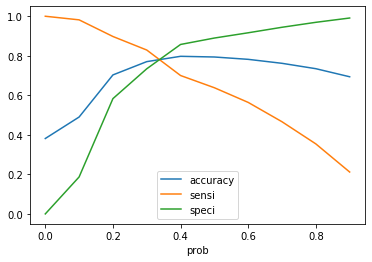

In [161]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.132810,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.140496,8064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.060159,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.315965,9117,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.565947,2402,1,1,1,1,1,1,1,0,0,0,0,1


In [163]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)


,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.132810,5493,0,1,1,0,0,0,0,0,0,0,0,0,13
1,0,0.140496,8064,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.060159,4716,0,1,0,0,0,0,0,0,0,0,0,0,6
3,0,0.315965,9117,0,1,1,1,1,0,0,0,0,0,0,1,32
4,1,0.565947,2402,1,1,1,1,1,1,1,0,0,0,0,1,57
5,0,0.122120,1796,0,1,1,0,0,0,0,0,0,0,0,0,12
6,0,0.122120,1120,0,1,1,0,0,0,0,0,0,0,0,0,12
7,0,0.074442,253,0,1,0,0,0,0,0,0,0,0,0,0,7
8,0,0.130370,1491,0,1,1,0,0,0,0,0,0,0,0,0,13
9,1,0.137021,2004,0,1,1,0,0,0,0,0,0,0,0,0,14


In [164]:

# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1999
0     412
Name: final_predicted, dtype: int64

In [165]:

# check the precentage of final_predicted conversions

1999/float(1999+412)

0.8291165491497304

In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7704113924050633

In [167]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2870, 1039],
       [ 412, 1999]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8291165491497304

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.734203121002814

In [171]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.26579687899718596


In [172]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6579986833443054


In [173]:
# Negative predictive value
print (TN / float(TN+ FN))

0.874466788543571


## Precision and Recall

In [174]:
# Looking at the confusion matrix again

In [175]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3478,  431],
       [ 872, 1539]], dtype=int64)

##### Precision
TP / TP + FP

In [176]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7812182741116751

##### Recall
TP / TP + FN

In [177]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6383243467440896

Using sklearn utilities for the same

In [178]:
from sklearn.metrics import precision_score, recall_score

In [179]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7812182741116751

In [180]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6383243467440896

### Precision and recall tradeoff

In [181]:
from sklearn.metrics import precision_recall_curve

In [182]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [183]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

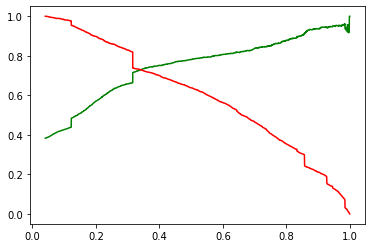

In [184]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [185]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [186]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,What is your current occupation_Working Professional,What is your current occupation_other
4664,-1.103429,-0.884316,0,0,0,1,0,0,0
5394,0.314849,-0.583371,0,0,0,1,0,0,1
1595,0.314849,1.264507,0,0,0,0,0,1,0
2111,1.378556,0.073571,0,0,0,0,0,0,1
9182,-1.103429,-0.884316,0,0,0,1,0,0,0


In [187]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [188]:
y_test_pred = res.predict(X_test_sm)

In [189]:
y_test_pred[:10]

4664    0.315965
5394    0.203089
1595    0.942607
2111    0.132767
9182    0.315965
1055    0.644520
541     0.103624
446     0.984846
3728    0.039440
4249    0.072063
dtype: float64

In [190]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
# Let's see the head
y_pred_1.head()

,0
4664,0.315965
5394,0.203089
1595,0.942607
2111,0.132767
9182,0.315965


In [192]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [193]:
# Putting lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [194]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [196]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,4664,0.315965
1,0,5394,0.203089
2,1,1595,0.942607
3,0,2111,0.132767
4,0,9182,0.315965


In [197]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [198]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead ID,Converted_Prob
0,0,4664,0.315965
1,0,5394,0.203089
2,1,1595,0.942607
3,0,2111,0.132767
4,0,9182,0.315965


In [199]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [200]:
y_pred_final.head()

,Converted,Lead ID,Converted_Prob,final_predicted
0,0,4664,0.315965,1
1,0,5394,0.203089,0
2,1,1595,0.942607,1
3,0,2111,0.132767,0
4,0,9182,0.315965,1


In [201]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,Lead ID,Converted_Prob,final_predicted,lead_score
0,0,4664,0.315965,1,32
1,0,5394,0.203089,0,20
2,1,1595,0.942607,1,94
3,0,2111,0.132767,0,13
4,0,9182,0.315965,1,32
5,1,1055,0.644520,1,64
6,0,541,0.103624,0,10
7,1,446,0.984846,1,98
8,0,3728,0.039440,0,4
9,0,4249,0.072063,0,7


In [202]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    902
0    164
Name: final_predicted, dtype: int64

In [203]:
# check the precentage of final_predicted conversions on test data

902/float(902+164)

0.8461538461538461

In [204]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1198,  445],
       [ 164,  902]], dtype=int64)

In [205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8461538461538461

In [207]:
# Let us calculate specificity
TN / float(TN+FP)

0.72915398660986

In [208]:

# Precision = TP / TP + FP
TP / (TP + FP)

0.6696362286562731

In [209]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8461538461538461

## Conclusion:

 The parameters that contributes the most towards a hot lead are as follows
    
a) Total Visits

b) Total Time Spent on Website

c) Lead Origin through Lead Add Form

d) Lead Source through -

i) Google
ii) Olark Chat
iii) Reference

e) What is your Current Occupationi) Working Professionals

ii) Other

Hence, in order to convert most leads X Education should calls these leads.
As suggested in the subjective answers, they should use Social Media in order to
promote the business when they don’t make phone calls and should use other means as
well like text messages and emails.